### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

Ans: $\gamma$ 折扣率，其一是因为当前的奖励对于当前的状态下执行的动作比起过去的或未来的奖励更重要，$\gamma$可以按时间来使过去或未来的
奖励对模型的重要性有所衰减。其二是若没有$\gamma$， 可能会导致状态无限循环。

2. Please breifly explain what is value function and what is Q function ?

Ans: 价值函数包含状态价值函数和动作价值函数（Q 函数）。

* 状态价值函数： $v(s) = E[U_t | S_t = s] $  
表示t时刻状态s能得到的未来回报的期望值。

* 动作价值函数： $q_\pi =  E_\pi[U_t | S_t = s, A_t = a]$  
表示t时刻状态s并选择一个动作a后能获得未来的回报的期望值。

3. How temperal difference related to dynamic programming and monte-carlo methods ?

Ans: 动态规划和蒙特卡洛方法最大的不同在于是否已知环境的状态转换概率。若已知环境的状态转换概率则可以使用动态规划迭代找出最优解。若未知环境状态转换
概率则需要不断地做实验采样，保证每种状态-动作的可能都被采样到，并利用采样得到的结果去平均去估计状态的期望值函数，也就是蒙特卡洛方法。

4. Please briefly describe what are value iteration and policy iteration ?

Ans:
价值迭代：对每一个当前状态 s ,对每个可能的动作 a 都计算一下采取这个动作后到达的下一个状态的期望价值。看看哪个动作可以到达的状态的期望价值
函数最大，就将这个最大的期望价值函数作为当前状态的价值函数$ V(s) $循环执行这个步骤，直到价值函数收敛。

策略迭代：从一个初始化的策略出发，先进行策略评估，然后改进策略，评估改进的策略，再进一步改进策略，经过不断迭代更新，直达策略收敛。


5. How can we use deep lerning in reinforcement learning ?

Ans:
使用深度学习方法构建一个网络模型，环境状态State作为模型的输入，中间可能会有一些CNN RNN等结构，然后输出对应着当前环境状态要做的动作。


### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

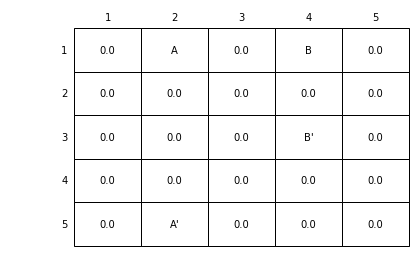

In [2]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])

    nrows, ncols = image.shape
    width, height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
    ax.add_table(tb)

##%%

WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE, WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment.
At each cell, four actions with equal probability are possible: north, south, east and west,
which deterministically cause the agent to move one cell in the respective direction on the grid.
Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1.
Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B.
From state A, all four actions yield a reward of +10 and take the agent to A'.
 From state B, all actions yield a reward of +5 and take the agent to B'.

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!